In [1]:
import scipy.misc as misc
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


#read image
def readImage(filename):
    f = misc.imread(filename, flatten=True).astype("float")
    return f

#write image
def writeImage(data,filename):
    misc.toimage(data,cmin=0,cmax=255).save(filename)

In [2]:
# randomly split train / test set.

allSetIndex = np.arange(1, 2430)
np.random.shuffle(allSetIndex)

trainSetIndex = allSetIndex[243:]
testSetIndex = allSetIndex[:243]


In [3]:
'''
randomly select 90% of these images and collect them into a set Xtrain; collect the remaining 10% into a set Xtest
'''

x_train = np.zeros((trainSetIndex.size, 19*19))
for idx, val in enumerate(trainSetIndex):
    filename = 'cbcl-faces/face' + format(val, '05d') + '.pgm'
    x_train[idx] = readImage(filename).flatten()

print (x_train.shape)

x_test = np.zeros((testSetIndex.size, 19*19))
for idx, val in enumerate(testSetIndex):
    filename = 'cbcl-faces/face' + format(val, '05d') + '.pgm'
    x_test[idx] = readImage(filename).flatten()

print(x_test.shape)

(2186, 361)
(243, 361)


In [4]:
'''
read the training images into a data matrix Xtrain and center the data, i.e. subtract the mean mtrain
now, read the test images into a data matrix Xtest and center the data w.r.t. the training mean, i.e. subtract mtrain

'''
mean_train = np.mean(x_train, axis=0)

x_train_zeromean = np.subtract(x_train, mean_train)
x_test_zeromean = np.subtract(x_test, mean_train)
# print (mean_train.shape)
# print (mean_train)
# print (x_train_zeromean.shape)
# print (x_train_zeromean)

covariance matrices are but a special kind ofHermitian matrices. If we want to compute their eigenvaluesand eigenvetors, we should therefore resort to the NumPy func-tion eigh because, as its name indicates, eigh is speciﬁcallytailored to Hermitian matrices 

NumPy / SciPy Recipes for Data Science: Eigenvalues/Eigenvectors of Covariance Matrices (PDF Download Available). Available from: https://www.researchgate.net/publication/281455336_NumPy_SciPy_Recipes_for_Data_Science_EigenvaluesEigenvectors_of_Covariance_Matrices?channel=doi&linkId=55e8babb08ae65b63899bb36&showFulltext=true [accessed Jun 24, 2017].

In [46]:
'''
compute the covariance matrix C as well as its eigenvectors vi and eigenvalues λi
'''

# compute sample covariance matrix
C = np.cov(x_train_zeromean.T)

# compute eigenvalues/eigenvectors using eigh
evalsh, evectsh = la.eigh(C)

inds = np.argsort(evalsh)[::-1]
evalsh = evalsh[inds]
evectsh = evectsh[:,inds]

# print (inds)
print (C.shape)
# print (C)
print (evalsh.shape)
# print (evalsh)
print (evectsh.shape)
# print (evectsh)

(361, 361)
(361,)
(361, 361)


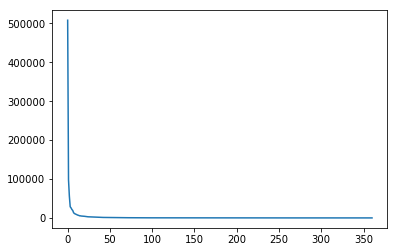

In [47]:
'''
plot the spectrum of C, i.e. the set of eigenvalues in descending order; what do you see?
'''
plt.plot(evalsh)
plt.show()

In [48]:
'''
determine the smallest eigenvalue Lk s.t. sum is 90% of total
'''
evalshTotal = np.sum(evalsh)
partialSum = 0
k = 0
for idx, val in enumerate(evalsh):
    partialSum += val
    if (partialSum/evalshTotal >= 0.9):
        k = idx
        break
print (k)
evalsh_k = evalsh[:k+1]
evectsh_k = evectsh.T[:k+1]
print (evalsh_k.shape)
print (evectsh_k.shape)

20
(21,)
(21, 361)


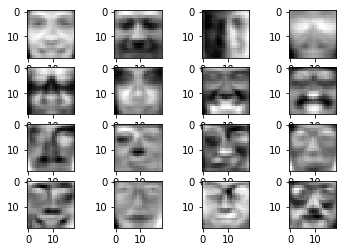

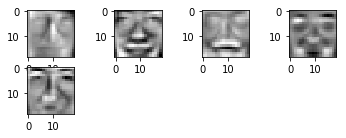

In [49]:
'''
visualize first K eigenvectors
'''
for i in range(len(evectsh_k)):
    if (i % 16 == 0) :
        plt.figure()
    plt.subplot(4, 4, (i%16)+1)
    plt.imshow(evectsh_k[i].reshape((19,19)), cmap='gray')
    
plt.show()

In [10]:
def euclideanDistance(p,q):
    p = np.asarray(p).flatten()
    q = np.asarray(q).flatten()
    return np.sqrt(np.sum(np.power((p - q), 2)))


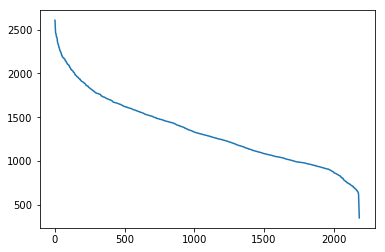

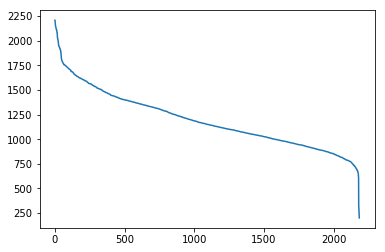

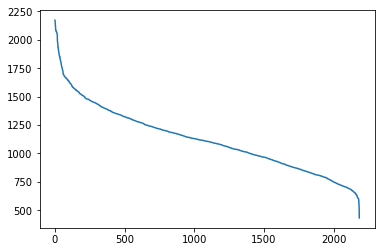

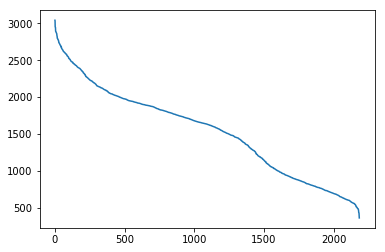

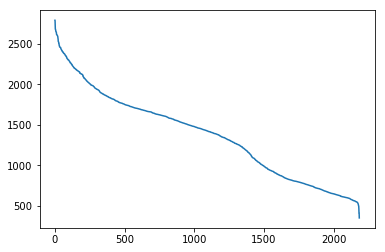

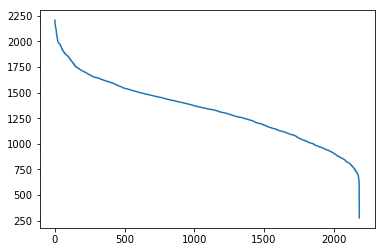

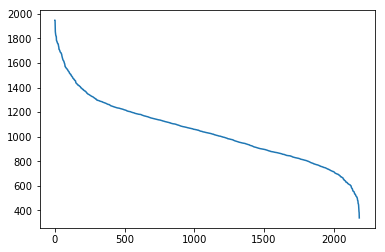

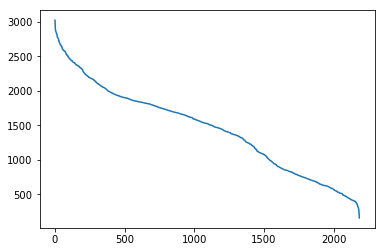

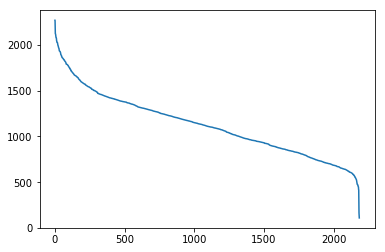

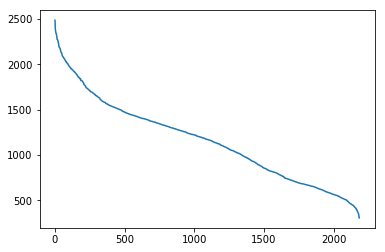

In [55]:
'''
randomly select 10 test images, compute their Euclidean distances to
all training images, sort (in descending order) and plot the distances
'''

distances_original = np.zeros((10, trainSetIndex.size))
nn_original = np.zeros((10))
for i in range(10):
    dist = np.zeros((trainSetIndex.size))
    for j in range(trainSetIndex.size):
        dist[j] = euclideanDistance(x_test_zeromean[i], x_train_zeromean[j]) 
    
    inds = np.argsort(dist)[::-1]
    dist = dist[inds]
    distances_original[i] = dist
    nn_original[i] = inds[-1]
    plt.figure()
    plt.plot(dist)

plt.show()

In [59]:
'''
now, project the training and test data into the subspace spanned by the first k eigenvectors of C
'''
x_projects_train = np.dot(x_train_zeromean, evectsh_k.T)
x_projects_test = np.dot(x_test_zeromean, evectsh_k.T)

print (x_projects_train.shape)
print (x_projects_test.shape)

(2186, 21)
(243, 21)


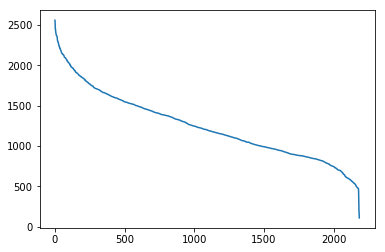

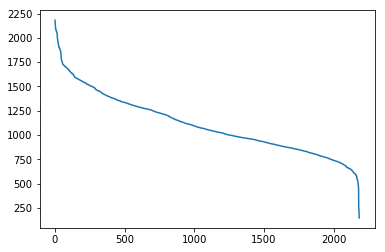

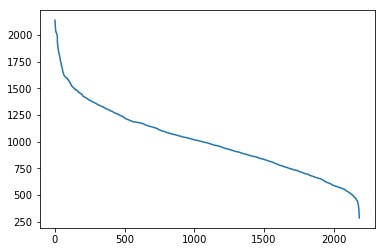

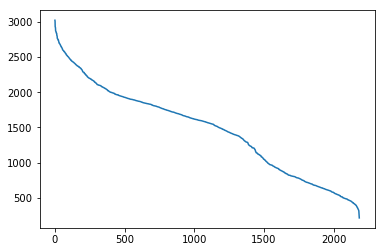

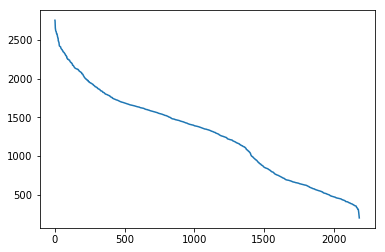

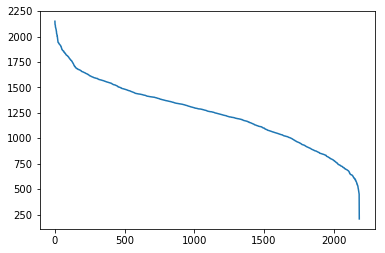

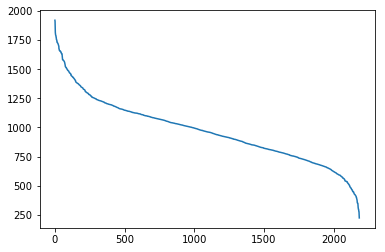

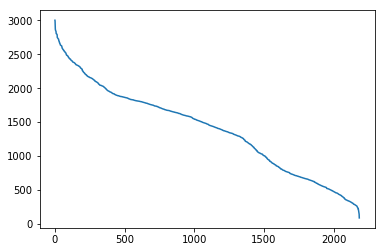

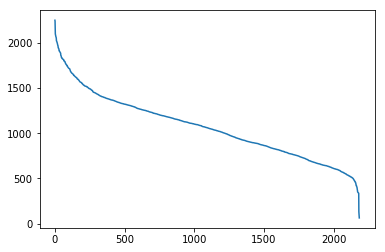

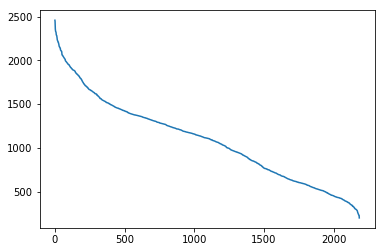

In [61]:
'''
consider the same 10 test images as above; 
in the lower dimensional space, 
compute their Euclidean distances to all the training images, 
sort the set of distances in descending order and plot them; 
compare your plots
'''
distances_subspace = np.zeros((10, trainSetIndex.size))
nn_subspace = np.zeros((10))
for i in range(10):
    dist = np.zeros((trainSetIndex.size))
    for j in range(trainSetIndex.size):
        dist[j] = euclideanDistance(x_projects_test[i], x_projects_train[j]) 
    
    inds = np.argsort(dist)[::-1]
    dist = dist[inds]
    distances_subspace[i] = dist
    nn_subspace[i] = inds[-1]
    plt.figure()
    plt.plot(dist)

plt.show()


In [63]:
'''
again, for the same 10 test images as above, 
use the Euclidean distance to determine their nearest neighbor among the training images; 
first, in the original space and then in the lower dimensional space; 
are the nearest neighbors you find identical in both cases?
'''
print (nn_original)
print (nn_subspace)

[  160.   120.  1065.   492.   447.   792.  1567.  1158.  1841.   246.]
[  160.   120.  1065.   492.   447.   792.  1567.  1158.  1841.  1099.]


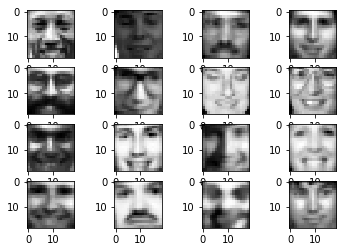

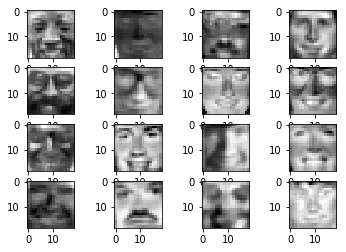

In [107]:
plt.figure()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i].reshape((19,19)), cmap='gray')

plt.figure()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train_zeromean[i].reshape((19,19)), cmap='gray')
    
plt.show()

In [35]:
for i in range(len(evectsh_k)):
    if (i % 16 == 0) :
        plt.figure()
    plt.subplot(4, 4, (i%16)+1)
    plt.imshow(x_train_project[40][i].reshape((19,19)), cmap='gray')
plt.show()

ValueError: cannot reshape array of size 1 into shape (19,19)